In [1]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tweets.csv')
df['id'] = range(0, len(df))
df = df[['id', 'Tweet']]
df.head()

,id,Tweet
0,0,russian media reports of another loss of russi...
1,1,"What a miserable life, to die in a foreign cou..."
2,2,"To this end, activity of the voice network of ..."
3,3,How can they call for 🌎🌍🌏PEACE with all the b...
4,4,_1love How can they call for 🌎🌍🌏PEACE with all...


In [3]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\uddee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping sentiment\vader_lexicon.zip.


True

In [4]:
sen = SentimentIntensityAnalyzer()
res = {}
for index, row in df.iterrows():
    tweet = row['Tweet']
    id = row['id']
    res[id] = sen.polarity_scores(tweet)


In [5]:
analysisDF = pd.DataFrame(res).T
analysisDF = analysisDF.reset_index().rename(columns={'index':'id'})
analysisDF = analysisDF.merge(df, how='left')

analysisDF.head()

,id,neg,neu,pos,compound,Tweet
0,0,0.241,0.759,0.0,-0.6597,russian media reports of another loss of russi...
1,1,0.203,0.797,0.0,-0.8126,"What a miserable life, to die in a foreign cou..."
2,2,0.000,1.000,0.0,0.0000,"To this end, activity of the voice network of ..."
3,3,0.000,1.000,0.0,0.0000,How can they call for 🌎🌍🌏PEACE with all the b...
4,4,0.000,1.000,0.0,0.0000,_1love How can they call for 🌎🌍🌏PEACE with all...


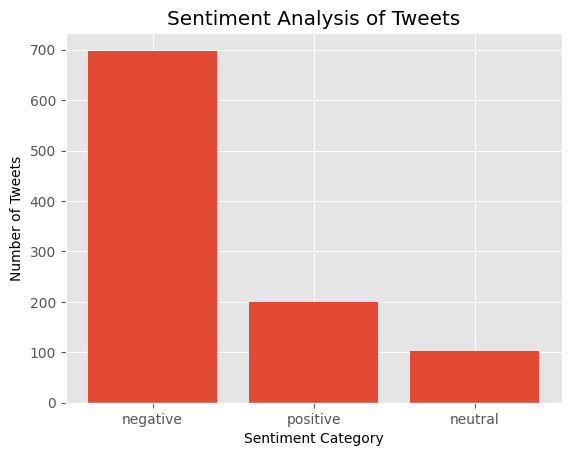

In [6]:
sentiment_counts = analysisDF['compound'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral').value_counts()
plt.style.use('ggplot')
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Analysis of Tweets')
plt.show()

In [7]:
analysisDF['sentiment'] = analysisDF['compound'].apply(lambda x: 1 if x > 0 else 0)
analysisDF.head()

,id,neg,neu,pos,compound,Tweet,sentiment
0,0,0.241,0.759,0.0,-0.6597,russian media reports of another loss of russi...,0
1,1,0.203,0.797,0.0,-0.8126,"What a miserable life, to die in a foreign cou...",0
2,2,0.000,1.000,0.0,0.0000,"To this end, activity of the voice network of ...",0
3,3,0.000,1.000,0.0,0.0000,How can they call for 🌎🌍🌏PEACE with all the b...,0
4,4,0.000,1.000,0.0,0.0000,_1love How can they call for 🌎🌍🌏PEACE with all...,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [9]:
X_train, X_test, y_train, y_test = train_test_split(analysisDF['Tweet'], analysisDF['sentiment'], test_size=0.2, random_state=42)

In [10]:
vectorizer = CountVectorizer(stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [11]:
clf = MultinomialNB()
clf.fit(X_train_vect, y_train)

MultinomialNB()

In [12]:
y_pred = clf.predict(X_test_vect)

In [13]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred))

Accuracy: 0.915
Classification report:               precision    recall  f1-score   support

           0       0.99      0.91      0.95       162
           1       0.71      0.95      0.81        38

    accuracy                           0.92       200
   macro avg       0.85      0.93      0.88       200
weighted avg       0.93      0.92      0.92       200



In [14]:
with open('model.pkl', 'wb') as f:
  pickle.dump((vectorizer, clf), f)